# Visualization

The first part of this notebook focuses on Visualizing the data

In [36]:
import json
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [37]:
dfHeart = pd.read_json('heartData.json')

Hours in miliseconds to window data for visualization

In [38]:
hourInMillis = 10**3*60*60

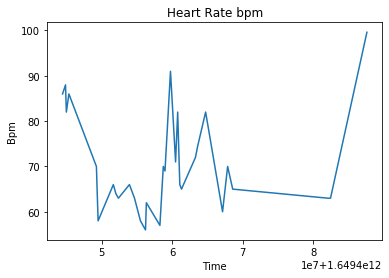

In [201]:
plt.title("Heart Rate bpm")
plt.xlabel("Time")
plt.ylabel("Bpm")
plt.plot(
    df.loc[(df["timeNanos"] < 1649444460000+hourInMillis*12)].iloc[:,0]
    ,df.loc[(df["timeNanos"] < 1649444460000+hourInMillis*12)].iloc[:,1])

In [40]:
dfSleep = pd.read_json('sleepData.json')

In [41]:
dfSleep["duration"] = dfSleep["endTimeNanos"]- dfSleep["startTimeNanos"]

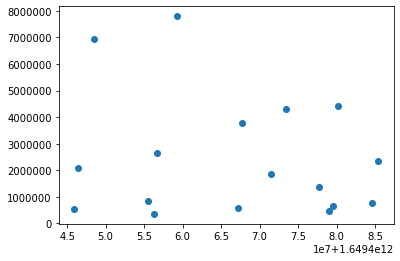

In [42]:
plt.scatter(
    dfSleep.loc[(dfSleep["startTimeNanos"] < 1649444460000+hourInMillis*12)].iloc[:,0]
    ,dfSleep.loc[(dfSleep["startTimeNanos"] < 1649444460000+hourInMillis*12)].iloc[:,-1])

In [43]:
dfHeart.rename(columns={'startTimeNanos': 'timeNanos'}, inplace=True)

In [187]:
df = pd.DataFrame()

In [127]:
df["timeNanos"] = dfHeart["timeNanos"]

In [128]:
df["value"] = dfHeart["value"]

In [133]:
df

""


In [188]:
i = 0
for time in range(1649444460000,1650557611729,60000):
    df.at[i,"timeNanos"] = time
    i += 1

In [190]:
temp =df.copy()

In [191]:
for i in range(len(dfHeart["timeNanos"])):
    df.at[df["timeNanos"]==dfHeart["timeNanos"][i],"value"] = dfHeart["value"][i]

In [192]:
df.loc[df["timeNanos"]==1649444460000]

,timeNanos,value
0,1.649444e+12,86.0


In [183]:
df.head()

,timeNanos,value,startTimeNanos,endTimeNanos,duration,isSleep
0,1.649444e+12,86.0,NaN,NaN,NaN,NaN
1,1.649445e+12,88.0,NaN,NaN,NaN,NaN
2,1.649445e+12,82.0,NaN,NaN,NaN,NaN
3,1.649445e+12,86.0,NaN,NaN,NaN,NaN
4,1.649445e+12,70.0,NaN,NaN,NaN,NaN


In [158]:
d = df.copy()

In [197]:
df = df.interpolate(method ='linear', limit_direction ='forward')

In [198]:
df.iloc[:,1].isnull().any()

False

In [64]:
df["startTimeNanos"] = [0]*len(df["timeNanos"])
df["endTimeNanos"] = [0]*len(df["timeNanos"])
df["duration"] = [0]*len(df["timeNanos"])
df["isSleep"] = [False]*len(df["timeNanos"])

In [202]:
for i in range(len(df["timeNanos"])):
    for j in range(len(dfSleep["startTimeNanos"])):
        if(df["timeNanos"][i] > dfSleep["startTimeNanos"][j] and df["timeNanos"][i] < dfSleep["endTimeNanos"][j]):
            
            df.at[i,"startTimeNanos"] = dfSleep["startTimeNanos"][j]
            df.at[i,"endTimeNanos"] = dfSleep["endTimeNanos"][j]
            df.at[i,"duration"] = dfSleep["duration"][j]
            df.at[i,"isSleep"] = True
            
        

In [103]:
df["isSleep"] = df.iloc[:,-1].isnull()

In [216]:
df.loc[:10985].to_csv("interpolatedData.csv")

In [211]:
d = df.copy()

In [214]:
df["value"] = round(df["value"])

In [217]:
df[df["isSleep"].isnull() != True]

,timeNanos,value,startTimeNanos,endTimeNanos,duration,isSleep
25,1.649446e+12,84.0,1.649446e+12,1.649446e+12,540000.0,True
26,1.649446e+12,83.0,1.649446e+12,1.649446e+12,540000.0,True
27,1.649446e+12,83.0,1.649446e+12,1.649446e+12,540000.0,True
28,1.649446e+12,83.0,1.649446e+12,1.649446e+12,540000.0,True
29,1.649446e+12,83.0,1.649446e+12,1.649446e+12,540000.0,True
...,...,...,...,...,...,...
10981,1.650103e+12,79.0,1.650101e+12,1.650104e+12,2460000.0,True
10982,1.650103e+12,79.0,1.650101e+12,1.650104e+12,2460000.0,True
10983,1.650103e+12,79.0,1.650101e+12,1.650104e+12,2460000.0,True
10984,1.650104e+12,79.0,1.650101e+12,1.650104e+12,2460000.0,True


In [208]:
df.loc[:10985]

,timeNanos,value,startTimeNanos,endTimeNanos,duration,isSleep
0,1.649444e+12,86.000000,NaN,NaN,NaN,NaN
1,1.649445e+12,86.285714,NaN,NaN,NaN,NaN
2,1.649445e+12,86.571429,NaN,NaN,NaN,NaN
3,1.649445e+12,86.857143,NaN,NaN,NaN,NaN
4,1.649445e+12,87.142857,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10981,1.650103e+12,79.000000,1.650101e+12,1.650104e+12,2460000.0,True
10982,1.650103e+12,79.000000,1.650101e+12,1.650104e+12,2460000.0,True
10983,1.650103e+12,79.000000,1.650101e+12,1.650104e+12,2460000.0,True
10984,1.650104e+12,79.000000,1.650101e+12,1.650104e+12,2460000.0,True
